In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.models import Sequential, load_model
from keras.layers import Dense, BatchNormalization
from keras.initializers import HeNormal
from matplotlib import image
from matplotlib import pyplot
import os
import shutil
import numpy as np
from PIL import Image
import pickle
from sklearn.preprocessing import MultiLabelBinarizer


# **Binary Basic NN**

In [ ]:
pathToDataBinary = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/"
print(pathToDataBinary + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Binary Split/train_X.p


In [ ]:
# load the test BINARY dataset to check loaded in Model
X_testUnflatB = pickle.load(open(pathToDataBinary+"test_X.p", 'rb'))
y_testUnflatB = pickle.load(open(pathToDataBinary+"test_Y.p", 'rb'))

print(X_testUnflatB.shape)
print(y_testUnflatB.shape)

X_testB = X_testUnflatB.reshape(X_testUnflatB.shape[0],-1)
y_testB = y_testUnflatB.reshape(y_testUnflatB.shape[0],-1)

print(X_testB.shape)
print(y_testB.shape)


(910, 208, 160, 3)
(910,)
(910, 99840)
(910, 1)


In [ ]:
pathToData = "drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/"
print(pathToData + "train_X.p")

drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/train_X.p


In [ ]:
#LOADING IN MULTI DATASET
mlb = MultiLabelBinarizer()
# load the train dataset
X_trainUnflat = pickle.load(open(pathToData+"train_X.p", 'rb'))
y_trainUnflat = pickle.load(open(pathToData+"train_Y.p", 'rb'))

print(X_trainUnflat.shape)
print(y_trainUnflat.shape)

X_train = X_trainUnflat.reshape(X_trainUnflat.shape[0],-1)
y_train = y_trainUnflat.reshape(y_trainUnflat.shape[0],-1)
y_train = mlb.fit_transform(y_train)

print(X_train.shape)
print(y_train.shape)

# load the dev dataset
X_devUnflat = pickle.load(open(pathToData+"dev_X.p", 'rb'))
y_devUnflat = pickle.load(open(pathToData+"dev_Y.p", 'rb'))

print(X_devUnflat.shape)
print(y_devUnflat.shape)

X_dev = X_devUnflat.reshape(X_devUnflat.shape[0],-1)
y_dev = y_devUnflat.reshape(y_devUnflat.shape[0],-1)
y_dev = mlb.fit_transform(y_dev)

print(X_dev.shape)
print(y_dev.shape)

# load the test dataset
X_testUnflat = pickle.load(open(pathToData+"test_X.p", 'rb'))
y_testUnflat = pickle.load(open(pathToData+"test_Y.p", 'rb'))

print(X_testUnflat.shape)
print(y_testUnflat.shape)

X_test = X_testUnflat.reshape(X_testUnflat.shape[0],-1)
y_test = y_testUnflat.reshape(y_testUnflat.shape[0],-1)
y_test = mlb.fit_transform(y_test)

print(X_test.shape)
print(y_test.shape)

(4246, 208, 160, 3)
(4246,)
(4246, 99840)
(4246, 3)
(910, 208, 160, 3)
(910,)
(910, 99840)
(910, 3)
(910, 208, 160, 3)
(910,)
(910, 99840)
(910, 3)


In [ ]:
pathToModels = "drive/MyDrive/CS 230 Final Project/Models/"
print(pathToData+"bestBinaryNNModel.h5")


drive/MyDrive/CS 230 Final Project/Final Data and CSVs/Final CSV Files and Data/Multi Split/bestBinaryNNModel.h5


In [ ]:
loadedBestModel = load_model(pathToModels+"bestBinaryNNModel.h5")

In [ ]:
_, accuracy = loadedBestModel.evaluate(X_testB, y_testB)
print('Test Accuracy: %.2f' % (accuracy*100))

29/29 [==============================] - 1s 10ms/step - loss: 1.4191 - accuracy: 0.8077
Test Accuracy: 80.77


In [ ]:
loadedBestModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 416)               41533856  
                                                                 
 dense_15 (Dense)            (None, 208)               86736     
                                                                 
 dense_16 (Dense)            (None, 104)               21736     
                                                                 
 dense_17 (Dense)            (None, 52)                5460      
                                                                 
 dense_18 (Dense)            (None, 26)                1378      
                                                                 
 dense_19 (Dense)            (None, 13)                351       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
#restarting
for layer in loadedBestModel.layers:
  layer.trainable = True

In [ ]:
for layer in loadedBestModel.layers[:2]:
  layer.trainable = False

In [ ]:
loadedBestModel.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_14 (Dense)            (None, 416)               41533856  
                                                                 
 dense_15 (Dense)            (None, 208)               86736     
                                                                 
 dense_16 (Dense)            (None, 104)               21736     
                                                                 
 dense_17 (Dense)            (None, 52)                5460      
                                                                 
 dense_18 (Dense)            (None, 26)                1378      
                                                                 
 dense_19 (Dense)            (None, 13)                351       
                                                                 
 dense_20 (Dense)            (None, 1)                

In [ ]:
#HYPERPARAMETER SEARCH, freezing first 2 layers
batchSizes = [100,200,300]
numEpochs = 50
print(batchSizes)

[100, 200, 300]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  loadedBestModel = load_model(pathToModels+"bestBinaryNNModel.h5")
  for layer in loadedBestModel.layers[:2]:
    layer.trainable = False
  print("BatchSize : ", batchSize)
  model = Sequential()
  for layer in loadedBestModel.layers[:-1]:
    model.add(layer)
    model.add(BatchNormalization())
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  history = model.fit(X_train, y_train, epochs=numEpochs, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  #print(historyDict.keys())
  #trainAccuracy.append(historyDict["accuracy"])
  #valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])

BatchSize :  100
Epoch 1/50
43/43 [==============================] - 3s 38ms/step - loss: 0.9006 - categorical_accuracy: 0.5704 - val_loss: 1.0703 - val_categorical_accuracy: 0.4769
Epoch 2/50
43/43 [==============================] - 1s 28ms/step - loss: 0.6467 - categorical_accuracy: 0.7106 - val_loss: 0.9939 - val_categorical_accuracy: 0.5187
Epoch 3/50
43/43 [==============================] - 1s 27ms/step - loss: 0.5646 - categorical_accuracy: 0.7586 - val_loss: 0.8262 - val_categorical_accuracy: 0.6604
Epoch 4/50
43/43 [==============================] - 1s 27ms/step - loss: 0.5154 - categorical_accuracy: 0.7869 - val_loss: 0.7626 - val_categorical_accuracy: 0.6868
Epoch 5/50
43/43 [==============================] - 1s 27ms/step - loss: 0.4844 - categorical_accuracy: 0.7977 - val_loss: 0.7046 - val_categorical_accuracy: 0.7187
Epoch 6/50
43/43 [==============================] - 1s 27ms/step - loss: 0.4583 - categorical_accuracy: 0.8085 - val_loss: 0.6166 - val_categorical_accuracy: 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


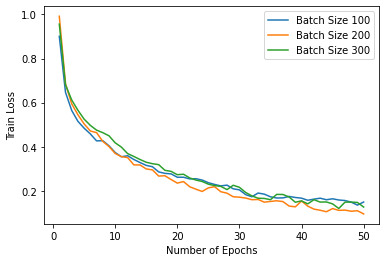

In [ ]:
#For Loss Plotting
num_epochs = numEpochs

x = [i for i in range(1,num_epochs+1)]
print(x)
yTrainLoss = trainLoss
#Train Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


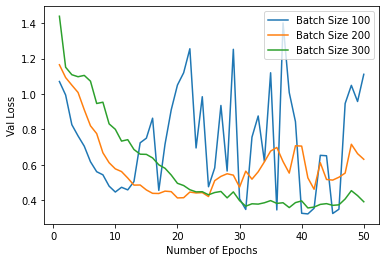

In [ ]:
#For Loss Plotting

x = [i for i in range(1,num_epochs+1)]
print(x)
yValLoss = valLoss
#Val Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
batchSizes = [100,200,300]
print(batchSizes)

[100, 200, 300]


[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


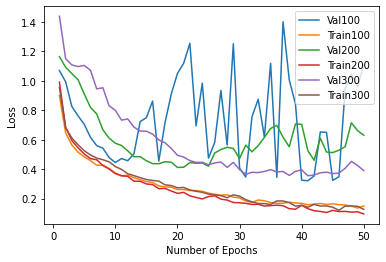

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label="Val"+str(currBatchSize))
  pyplot.plot(x, yTrainLoss[i],label="Train"+str(currBatchSize))

#pyplot.xlim([5,21])
#pyplot.ylim([0,5])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.show()

In [ ]:
bestBatchSize = 100 #must decide based on graphs
bestEpoch = 10

In [ ]:
loadedBestModel = load_model(pathToModels+"bestBinaryNNModel.h5")
for layer in loadedBestModel.layers[:2]:
  layer.trainable = False
bestmodel5 = Sequential()
for layer in loadedBestModel.layers[:-1]:
  bestmodel5.add(layer)
  bestmodel5.add(BatchNormalization())
bestmodel5.add(Dense(3, activation='softmax'))
bestmodel5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
bestmodel5.fit(X_train, y_train, epochs=bestEpoch, batch_size=bestBatchSize, validation_data = (X_dev, y_dev))


Epoch 1/10
43/43 [==============================] - 3s 39ms/step - loss: 0.8398 - categorical_accuracy: 0.6222 - val_loss: 1.1323 - val_categorical_accuracy: 0.4011
Epoch 2/10
43/43 [==============================] - 1s 27ms/step - loss: 0.6021 - categorical_accuracy: 0.7593 - val_loss: 1.0078 - val_categorical_accuracy: 0.5143
Epoch 3/10
43/43 [==============================] - 1s 28ms/step - loss: 0.5387 - categorical_accuracy: 0.7866 - val_loss: 0.8721 - val_categorical_accuracy: 0.6000
Epoch 4/10
43/43 [==============================] - 1s 28ms/step - loss: 0.4905 - categorical_accuracy: 0.8090 - val_loss: 0.7702 - val_categorical_accuracy: 0.6791
Epoch 5/10
43/43 [==============================] - 1s 28ms/step - loss: 0.4573 - categorical_accuracy: 0.8170 - val_loss: 0.7149 - val_categorical_accuracy: 0.7110
Epoch 6/10
43/43 [==============================] - 1s 28ms/step - loss: 0.4330 - categorical_accuracy: 0.8330 - val_loss: 0.5754 - val_categorical_accuracy: 0.7593
Epoch 7/10

In [ ]:
predictions = bestmodel5.predict(X_test)
yTestNew = y_test.argmax(axis=1)
yPredNew = predictions.argmax(axis=1)

print(yTestNew)
print(yPredNew)

[1 0 0 0 2 1 1 0 1 1 2 0 1 1 1 0 0 1 2 2 0 0 2 0 1 0 0 2 2 1 0 1 2 0 1 0 0
 0 0 0 1 1 1 2 1 2 1 2 1 2 0 1 1 1 1 1 0 1 1 0 1 2 0 1 0 0 1 0 1 2 2 1 2 1
 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 0 2 1 1 1 1 1 0 2 1 2 1 1 1 0 0 1 1 0 1 0
 0 2 1 1 1 1 0 2 0 0 0 2 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 2 2 1 2 1 0 0 0 0 0
 1 1 1 1 1 1 1 2 1 0 2 1 0 2 1 0 1 0 0 0 2 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 0
 1 0 2 1 0 2 0 2 1 2 2 2 2 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 2 0 0 1 0 1 2 1 1 1 1 0 0 2 1 1 1 2 2 0 1 0 1 0 1 2 1 0 1 1 0 0 2 0 1 1 1
 1 2 1 0 1 1 0 1 1 1 1 1 0 1 2 2 2 1 0 2 2 1 0 1 1 1 2 2 1 0 0 2 0 1 2 2 1
 2 1 1 0 2 2 1 2 0 1 1 1 1 1 0 1 0 0 1 0 2 0 0 1 1 2 1 0 2 0 1 1 0 0 1 1 2
 2 0 1 1 0 1 1 1 0 0 1 1 0 1 0 2 1 0 2 1 1 1 1 1 0 1 2 1 1 1 0 1 1 1 2 0 2
 0 0 0 1 2 2 2 1 1 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 2 0 0 2 0 1 0 1 1 2 0 0 1
 1 0 1 2 2 0 2 0 2 2 1 1 1 1 1 2 2 0 2 0 0 1 0 0 1 0 0 2 2 0 0 1 0 1 1 0 0
 1 0 1 1 1 0 2 0 1 0 1 0 1 0 1 0 1 2 2 0 0 0 1 1 2 0 1 0 0 1 2 1 0 0 2 1 2
 1 1 0 1 1 0 2 0 1 0 1 0 

0.7825120407686024


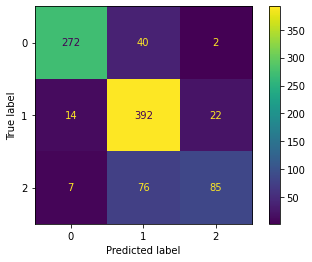

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

cM = confusion_matrix(yTestNew,yPredNew)

displayClasses = [i for i in range(3)]

print(f1_score(yTestNew, yPredNew, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=displayClasses)
disp.plot()
pyplot.show()

In [ ]:
#HYPERPARAMETER SEARCH while freezing first 4 layers!
batchSizes = [100,200,300]
numEpochs = 50
print(batchSizes)

[100, 200, 300]


In [ ]:
trainAccuracy = []
valAccuracy = []
trainLoss = []
valLoss = []

for batchSize in batchSizes:
  loadedBestModel = load_model(pathToModels+"bestBinaryNNModel.h5")
  for layer in loadedBestModel.layers[:4]:
    layer.trainable = False
  print("BatchSize : ", batchSize)
  model = Sequential()
  for layer in loadedBestModel.layers[:-1]:
    model.add(layer)
    model.add(BatchNormalization())
  model.add(Dense(3, activation='softmax'))
  model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
  history = model.fit(X_train, y_train, epochs=numEpochs, batch_size=batchSize, validation_data = (X_dev, y_dev))
  historyDict = history.history
  #print(historyDict.keys())
  #trainAccuracy.append(historyDict["accuracy"])
  #valAccuracy.append(historyDict["val_accuracy"])
  trainLoss.append(historyDict['loss'])
  valLoss.append(historyDict['val_loss'])

BatchSize :  100
Epoch 1/50
43/43 [==============================] - 4s 40ms/step - loss: 1.2092 - categorical_accuracy: 0.4133 - val_loss: 1.1149 - val_categorical_accuracy: 0.2571
Epoch 2/50
43/43 [==============================] - 1s 29ms/step - loss: 0.9561 - categorical_accuracy: 0.5391 - val_loss: 1.0643 - val_categorical_accuracy: 0.4505
Epoch 3/50
43/43 [==============================] - 1s 31ms/step - loss: 0.8287 - categorical_accuracy: 0.6192 - val_loss: 1.0292 - val_categorical_accuracy: 0.5165
Epoch 4/50
43/43 [==============================] - 1s 28ms/step - loss: 0.7648 - categorical_accuracy: 0.6651 - val_loss: 0.9503 - val_categorical_accuracy: 0.5802
Epoch 5/50
43/43 [==============================] - 1s 29ms/step - loss: 0.7151 - categorical_accuracy: 0.6861 - val_loss: 0.8716 - val_categorical_accuracy: 0.6275
Epoch 6/50
43/43 [==============================] - 1s 28ms/step - loss: 0.6783 - categorical_accuracy: 0.7063 - val_loss: 0.8014 - val_categorical_accuracy: 

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


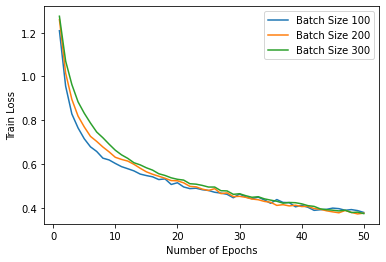

In [ ]:
#For Loss Plotting
num_epochs = numEpochs

x = [i for i in range(1,num_epochs+1)]
print(x)
yTrainLoss = trainLoss
#Train Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yTrainLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Train Loss")
pyplot.show()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


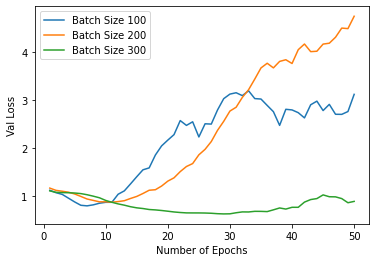

In [ ]:
#For Loss Plotting

x = [i for i in range(1,num_epochs+1)]
print(x)
yValLoss = valLoss
#Val Loss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label=labelName)

pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Val Loss")
pyplot.show()

In [ ]:
batchSizes = [100,200,300]
print(batchSizes)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50]


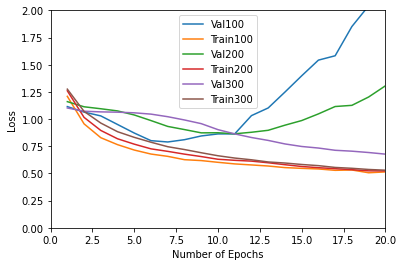

In [ ]:
#For Loss Plotting

x = [i for i in range(1,numEpochs+1)]
print(x)
yValLoss = valLoss
for i in range(len(batchSizes)):
  currBatchSize = batchSizes[i]
  labelName = "Batch Size " + str(currBatchSize)
  pyplot.plot(x, yValLoss[i],label="Val"+str(currBatchSize))
  pyplot.plot(x, yTrainLoss[i],label="Train"+str(currBatchSize))

pyplot.xlim([0,20])
pyplot.ylim([0,2])
pyplot.legend()
pyplot.xlabel("Number of Epochs")
pyplot.ylabel("Loss")
pyplot.show()

In [ ]:
bestBatchSize = 100 #must decide based on graphs
bestEpoch = 6


In [ ]:
loadedBestModel = load_model(pathToModels+"bestBinaryNNModel.h5")
for layer in loadedBestModel.layers[:4]:
  layer.trainable = False
bestmodel5 = Sequential()
for layer in loadedBestModel.layers[:-1]:
  bestmodel5.add(layer)
  bestmodel5.add(BatchNormalization())
bestmodel5.add(Dense(3, activation='softmax'))
bestmodel5.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['categorical_accuracy'])
bestmodel5.fit(X_train, y_train, epochs=bestEpoch, batch_size=bestBatchSize, validation_data = (X_dev, y_dev))


Epoch 1/6
43/43 [==============================] - 4s 43ms/step - loss: 1.0831 - categorical_accuracy: 0.5057 - val_loss: 1.0669 - val_categorical_accuracy: 0.4626
Epoch 2/6
43/43 [==============================] - 1s 30ms/step - loss: 0.8828 - categorical_accuracy: 0.6159 - val_loss: 1.0492 - val_categorical_accuracy: 0.4923
Epoch 3/6
43/43 [==============================] - 1s 29ms/step - loss: 0.7925 - categorical_accuracy: 0.6778 - val_loss: 0.9770 - val_categorical_accuracy: 0.5604
Epoch 4/6
43/43 [==============================] - 1s 28ms/step - loss: 0.7404 - categorical_accuracy: 0.6962 - val_loss: 0.8807 - val_categorical_accuracy: 0.6582
Epoch 5/6
43/43 [==============================] - 1s 28ms/step - loss: 0.7032 - categorical_accuracy: 0.7141 - val_loss: 0.8271 - val_categorical_accuracy: 0.6758
Epoch 6/6
43/43 [==============================] - 1s 28ms/step - loss: 0.6749 - categorical_accuracy: 0.7219 - val_loss: 0.8303 - val_categorical_accuracy: 0.7055


In [ ]:
predictions = bestmodel5.predict(X_test)
yTestNew = y_test.argmax(axis=1)
yPredNew = predictions.argmax(axis=1)

print(yTestNew)
print(yPredNew)

[1 0 0 0 2 1 1 0 1 1 2 0 1 1 1 0 0 1 2 2 0 0 2 0 1 0 0 2 2 1 0 1 2 0 1 0 0
 0 0 0 1 1 1 2 1 2 1 2 1 2 0 1 1 1 1 1 0 1 1 0 1 2 0 1 0 0 1 0 1 2 2 1 2 1
 1 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 0 2 1 1 1 1 1 0 2 1 2 1 1 1 0 0 1 1 0 1 0
 0 2 1 1 1 1 0 2 0 0 0 2 0 1 1 1 0 0 1 1 0 1 1 1 1 0 1 2 2 1 2 1 0 0 0 0 0
 1 1 1 1 1 1 1 2 1 0 2 1 0 2 1 0 1 0 0 0 2 1 1 1 2 1 1 1 1 0 1 1 1 1 1 0 0
 1 0 2 1 0 2 0 2 1 2 2 2 2 1 1 1 0 1 1 0 1 0 1 1 1 1 1 1 1 0 0 0 0 0 1 0 0
 2 0 0 1 0 1 2 1 1 1 1 0 0 2 1 1 1 2 2 0 1 0 1 0 1 2 1 0 1 1 0 0 2 0 1 1 1
 1 2 1 0 1 1 0 1 1 1 1 1 0 1 2 2 2 1 0 2 2 1 0 1 1 1 2 2 1 0 0 2 0 1 2 2 1
 2 1 1 0 2 2 1 2 0 1 1 1 1 1 0 1 0 0 1 0 2 0 0 1 1 2 1 0 2 0 1 1 0 0 1 1 2
 2 0 1 1 0 1 1 1 0 0 1 1 0 1 0 2 1 0 2 1 1 1 1 1 0 1 2 1 1 1 0 1 1 1 2 0 2
 0 0 0 1 2 2 2 1 1 1 1 0 1 0 0 2 1 1 1 1 1 0 1 1 2 0 0 2 0 1 0 1 1 2 0 0 1
 1 0 1 2 2 0 2 0 2 2 1 1 1 1 1 2 2 0 2 0 0 1 0 0 1 0 0 2 2 0 0 1 0 1 1 0 0
 1 0 1 1 1 0 2 0 1 0 1 0 1 0 1 0 1 2 2 0 0 0 1 1 2 0 1 0 0 1 2 1 0 0 2 1 2
 1 1 0 1 1 0 2 0 1 0 1 0 

0.6012784130018368


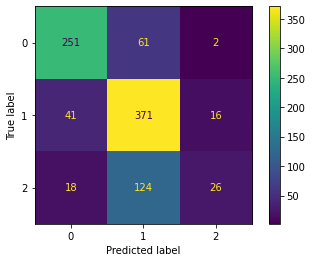

In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, f1_score

cM = confusion_matrix(yTestNew,yPredNew)

displayClasses = [i for i in range(3)]

print(f1_score(yTestNew, yPredNew, average='macro'))

disp = ConfusionMatrixDisplay(confusion_matrix=cM, display_labels=displayClasses)
disp.plot()
pyplot.show()